## Task 5. Parallel Bifurcation map

In [ ]:
!pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438527 sha256=9f7100d36fc62b487fbb8915d8b7a397e089e66b344eaa447ceda0dfcf4fb836
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


In [ ]:
from mpi4py import MPI
import time

In [ ]:
%%writefile bifurcation_parallel.py

# !mpirun --allow-run-as-root -n [number_of_processes] python bifurcation_parallel.py [number of bifurcation parameter] [Number of iterations]

from mpi4py import MPI
import numpy as np
import sys

r_n = int(sys.argv[1])
NITER = int(sys.argv[2])

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

R_total = np.linspace(0,4,r_n)
R = np.array_split(R_total, size)[rank]


X = np.random.rand(len(R))
for i in range(NITER): X=(R*X)*(1-X)

temp_total_X = comm.gather(X, root = 0)
if rank == 0:
    total_X = np.concatenate(temp_total_X)

Writing bifurcation_parallel.py


In [ ]:
T = []
for i in range(1,11):
    t_start = time.time()
    !mpirun --allow-run-as-root -n {i} python bifurcation_parallel.py 50000 1000 
    t_end = time.time()
    T.append(t_end-t_start)
    print('Time: {:6.4f}     Processes: {}'.format(T[-1],i))

Time: 1.0279     Processes: 1
Time: 1.0439     Processes: 2
Time: 1.3496     Processes: 3
Time: 1.9334     Processes: 4
Time: 2.3438     Processes: 5
Time: 2.5551     Processes: 6
Time: 2.9585     Processes: 7
Time: 3.2443     Processes: 8
Time: 3.7615     Processes: 9
Time: 3.7389     Processes: 10


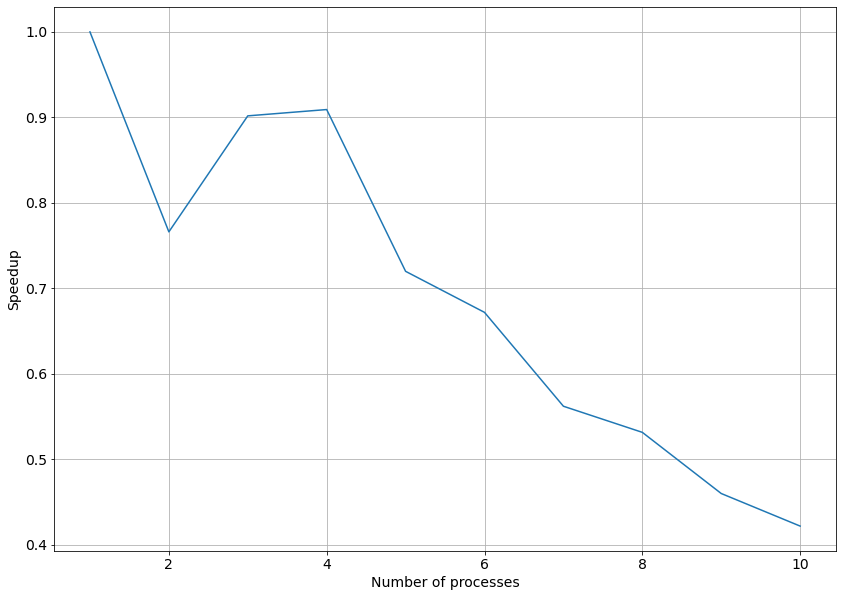

In [ ]:
import matplotlib.pyplot as plt

speedup=[T[0]/i for i in T]
plt.figure(figsize=(14,10))
plt.plot(range(1,11), speedup)
plt.ylabel('Speedup', fontsize=14)
plt.xlabel('Number of processes', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid();